In [1]:
from src.datasets.shape_net.shape_net_v3_sdf import ShapeNetV3SDF
from src.training.ModelTrainer import ModelTrainer
#from src.datasets.shape_net.shape_net_v2_sdf import ShapeNetV2SDF
from src.utils.util import seed_all
from src.utils.visualizations import visualize_sdf_as_mesh
from src.pre_processing.extract_snet_indices_global import ExtractSnetIndices
from tqdm.notebook import tqdm as tqdm
import numpy as np
import torch
%load_ext autoreload
%load_ext tensorboard
%autoreload 2
seed_all(111)
x = torch.cuda.mem_get_info()
trainer = ModelTrainer(dataset_type=ShapeNetV3SDF,
                       options={"tdm_notebook": True})

dataset = trainer.data_loader_handler.dataset
from tqdm.notebook import tqdm as tqdm
import json
print(x)

Using device: cuda:0
{'name': 'globalPVQVAEVGGDisc', 'description': 'plz', 'experiment_id': 'vis', 'extra_notes': 'none', 'logs_dir': 'logs', 'is_train': True, 'device': 'cuda:0', 'batch_size': 16, 'num_workers': 16, 'test_size': 0.1, 'n_epochs': 50000, 'append_loss_every': 250, 'print_every': 500, 'validate_every': 1973, 'save_every': 1973, 'save_every_nepochs': 5, 'start_epoch': 0, 'start_iteration': 0, 'visualize_every': 1000, 'apply_metrics_every': 1973, 'load_ckpt': True, 'ckpt_path': 'logs/globalPVQVAEVGGDisc/LinearDiscExp3G1.0e-2@25kBoth/2024_07_10_19_13_37/checkpoints/epoch-best.ckpt', 'use_scheduler': True, 'apply_metrics_batch_count': 5}


- Creating new directory logs/globalPVQVAEVGGDisc/vis/2024_07_11_18_53_12
- Creating new directory logs/globalPVQVAEVGGDisc/vis/2024_07_11_18_53_12/checkpoints
- Creating new directory logs/globalPVQVAEVGGDisc/vis/2024_07_11_18_53_12/tb
- Creating new directory logs/globalPVQVAEVGGDisc/vis/2024_07_11_18_53_12/visuals
- Creating new directory logs/globalPVQVAEVGGDisc/vis/2024_07_11_18_53_12/modelsummary


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[*] Enc has Attn at i_level, i_block: 3, 0
Decoding of shape (1, 256, 8, 8, 8) = 131072 dimensions.
[*] Dec has Attn at i_level, i_block: 3, 0
VGG loaded from logs/VGG/trainFull/2024_07_01_17_50_17/checkpoints/epoch-36.ckpt
Using device: cuda:0
Initializing model weights with normal initialization
Model loaded from logs/globalPVQVAEVGGDisc/LinearDiscExp3G1.0e-2@25kBoth/2024_07_10_19_13_37/checkpoints/epoch-best.ckpt
Model size: 296.617MB
Total_params: 77.7M
(10120527872, 10385358848)


In [2]:
dataset = trainer.data_loader_handler.dataset
len(dataset)
global_dict = {}
patched_dict = {}
indices = np.arange(0,513)
for index in indices:
    global_dict[f"{index}"] = 0
    patched_dict[f"{index}"] = 0

global_dict

{'0': 0,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 0,
 '16': 0,
 '17': 0,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 0,
 '27': 0,
 '28': 0,
 '29': 0,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0,
 '34': 0,
 '35': 0,
 '36': 0,
 '37': 0,
 '38': 0,
 '39': 0,
 '40': 0,
 '41': 0,
 '42': 0,
 '43': 0,
 '44': 0,
 '45': 0,
 '46': 0,
 '47': 0,
 '48': 0,
 '49': 0,
 '50': 0,
 '51': 0,
 '52': 0,
 '53': 0,
 '54': 0,
 '55': 0,
 '56': 0,
 '57': 0,
 '58': 0,
 '59': 0,
 '60': 0,
 '61': 0,
 '62': 0,
 '63': 0,
 '64': 0,
 '65': 0,
 '66': 0,
 '67': 0,
 '68': 0,
 '69': 0,
 '70': 0,
 '71': 0,
 '72': 0,
 '73': 0,
 '74': 0,
 '75': 0,
 '76': 0,
 '77': 0,
 '78': 0,
 '79': 0,
 '80': 0,
 '81': 0,
 '82': 0,
 '83': 0,
 '84': 0,
 '85': 0,
 '86': 0,
 '87': 0,
 '88': 0,
 '89': 0,
 '90': 0,
 '91': 0,
 '92': 0,
 '93': 0,
 '94': 0,
 '95': 0,
 '96': 0,
 '97': 0,
 '98': 0,
 '99': 0,
 '100': 0,

In [3]:
for item in tqdm(dataset, total=len(dataset)):
    code_idx_patched = item["idx"].flatten()
    code_idx_global = item["idx_global"].flatten()
    for idx in code_idx_global:
        global_dict[f"{idx}"] += 1
    for idx_g in code_idx_patched:
        patched_dict[f"{idx_g}"] += 1


  0%|          | 0/6579 [00:00<?, ?it/s]

In [5]:
global_dict
#patched_dict

{'0': 4519,
 '1': 6686,
 '2': 6460,
 '3': 0,
 '4': 9686,
 '5': 10750,
 '6': 10876,
 '7': 3995,
 '8': 17751,
 '9': 9768,
 '10': 3903,
 '11': 4996,
 '12': 10078,
 '13': 0,
 '14': 0,
 '15': 2053,
 '16': 3079,
 '17': 3379,
 '18': 5598,
 '19': 2274,
 '20': 5390,
 '21': 6851,
 '22': 2392,
 '23': 3045,
 '24': 0,
 '25': 11625,
 '26': 4801,
 '27': 5645,
 '28': 3763,
 '29': 5638,
 '30': 8704,
 '31': 2667,
 '32': 7630,
 '33': 4284,
 '34': 5395,
 '35': 5042,
 '36': 7780,
 '37': 7747,
 '38': 2061,
 '39': 5517,
 '40': 3704,
 '41': 0,
 '42': 0,
 '43': 5531,
 '44': 12059,
 '45': 4931,
 '46': 21814,
 '47': 1752,
 '48': 7008,
 '49': 4494,
 '50': 6435,
 '51': 1947,
 '52': 1754,
 '53': 4225,
 '54': 6147,
 '55': 9104,
 '56': 6136,
 '57': 2965,
 '58': 4143,
 '59': 4583,
 '60': 4969,
 '61': 14449,
 '62': 22956,
 '63': 2556,
 '64': 7684,
 '65': 6889,
 '66': 13191,
 '67': 4961,
 '68': 1210,
 '69': 0,
 '70': 0,
 '71': 8195,
 '72': 6094,
 '73': 6452,
 '74': 7132,
 '75': 6710,
 '76': 5102,
 '77': 2493,
 '78': 621

In [6]:
 with open(f"./src/testVisuals/global_indices_gan.json", "w") as file1:
            json_object = json.dumps(global_dict, indent=4)
            file1.write(str(json_object))

with open(f"./src/testVisuals/patched_indices_check.json", "w") as file1:
            json_object = json.dumps(patched_dict, indent=4)
            file1.write(str(json_object))
            

In [ ]:
k = np.array(list(global_dict.values())).sum()

In [ ]:
k

In [ ]:
k = np.array(list(patched_dict.values())).sum()

In [ ]:
k

In [7]:
for index in indices:
    global_dict[f"{index}"] =  global_dict[f"{index}"]*100
    patched_dict[f"{index}"] = patched_dict[f"{index}"]*100

Text(0.5, 1.0, 'Codebook Index')

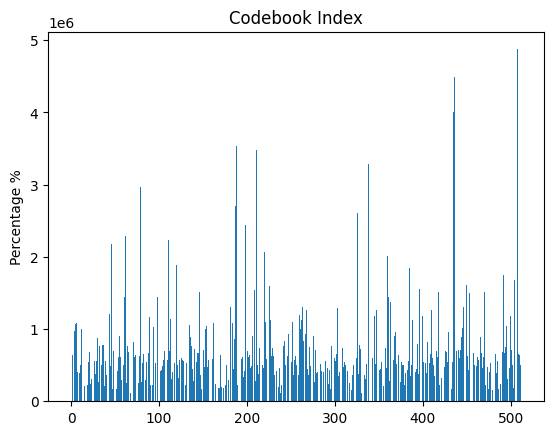

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

percentages = np.array(list(global_dict.values()))
ax.bar(indices, percentages)
ax.set_ylabel('Percentage %')
ax.set_title('Codebook Index')


In [ ]:
percentages = np.array(list(global_dict.values()))

In [ ]:
percentages[percentages==0].shape

In [ ]:
155/512